In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

In [2]:
df = acquire.get_telco_data()

In [3]:
# first n rows

df.head(10)

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
1,1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,2,1,1,1,0015-UOCOJ,Female,1,No,No,7,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,3,1,1,1,0023-HGHWL,Male,1,No,No,1,...,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
4,4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,...,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
5,5,1,1,1,0067-DKWBL,Male,1,No,No,2,...,No,No,No,Yes,49.25,91.1,Yes,Month-to-month,DSL,Electronic check
6,6,2,1,1,0076-LVEPS,Male,0,No,Yes,29,...,Yes,No,No,Yes,45.00,1242.45,No,Month-to-month,DSL,Mailed check
7,7,2,1,1,0082-LDZUE,Male,0,No,No,1,...,No,No,No,Yes,44.30,44.3,No,Month-to-month,DSL,Mailed check
8,8,1,1,1,0096-BXERS,Female,0,Yes,No,6,...,No,No,No,No,50.35,314.55,No,Month-to-month,DSL,Electronic check
9,9,2,1,1,0096-FCPUF,Male,0,No,No,30,...,No,No,Yes,Yes,64.50,1888.45,No,Month-to-month,DSL,Mailed check


In [4]:
# rows & columns

df.shape

(7043, 25)

In [5]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [6]:
# Get summary statistics for numeric columns.

df.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,2033.283305,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1760.500000,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,3521.000000,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,5281.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


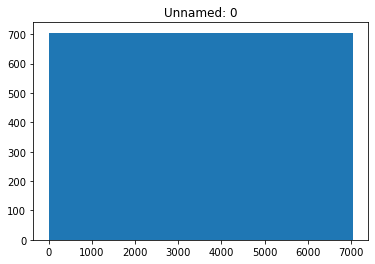

In [ ]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

In [ ]:
missing = df.isnull().sum()
missing[missing > 0]

In [ ]:
# Drop duplicates...run just in case; reassign and check the shape of my data.

df = df.drop_duplicates()
df.shape

In [ ]:
df.head()

In [ ]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.

cols_to_drop = ['Unnamed: 0']
df = df.drop(columns=cols_to_drop)
df.shape

In [ ]:
df.total_charges.dtypes

In [ ]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [ ]:
df.dtypes

In [ ]:
df['total_charges'].value_counts()

In [ ]:
dummy_df = pd.get_dummies(df[['gender','partner','dependents','phone_service','multiple_lines', 'online_security','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type', 'online_backup']], dummy_na=False, drop_first=[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True])
dummy_df.head()

In [ ]:
list(dummy_df.columns)

In [ ]:
dummy_df = dummy_df.rename(columns = {'gender_Male' : 'male', 'partner_Yes' : 'partner', 'dependents_Yes' : 'dependents', 'phone_service_Yes' : 'phone_service', 'multiple_lines_No phone service' : 'no_phone_service', 'multiple_lines_Yes' : 'multiple_lines', 'online_security_No internet service' : 'no_internet_service', 'online_security_Yes' : 'online_security', 'device_protection_Yes' : 'device_protection', 'tech_support_Yes' : 'tech_support', 'streaming_tv_Yes' : 'streaming_tv', 'streaming_movies_Yes' : 'streaming_movies', 'paperless_billing_Yes' : 'paperless', 'churn_Yes' : 'churn', 'contract_type_One year' : 'one_year', 'contract_type_Two year' : 'two_year', 'internet_service_type_Fiber optic' : 'fiber_optic', 'payment_type_Credit card (automatic)' : 'credit_card', 'payment_type_Electronic check' : 'electric_check', 'payment_type_Mailed check' : 'mailed_check', 'online_backup_Yes' : 'online_backup'})

In [ ]:
dummy_df = dummy_df.drop(columns = ['device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'internet_service_type_None', 'online_backup_No internet service'])

In [ ]:
dummy_df.head()

In [ ]:
list(dummy_df.columns)

In [ ]:
list(df.columns)

In [ ]:
new_df = df.drop(columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'online_backup'])

In [ ]:
new_df.head()

In [ ]:
new_df = pd.concat([new_df, dummy_df], axis=1)
new_df.head(1)

In [ ]:
list(new_df.columns)

In [ ]:
new_df.shape

In [ ]:
new_df.head()

In [ ]:
def prep_teclo(df):
    df = df.drop_duplicates()
    
    cols_to_drop = ['Unnamed: 0']
    df = df.drop(columns=cols_to_drop)
    
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
    
    dummy_df = pd.get_dummies(df[['gender','partner','dependents','phone_service','multiple_lines', 'online_security','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type', 'online_backup']], dummy_na=False, drop_first=[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True])
    
    dummy_df = dummy_df.rename(columns = {'gender_Male' : 'male', 'partner_Yes' : 'partner', 'dependents_Yes' : 'dependents', 'phone_service_Yes' : 'phone_service', 'multiple_lines_No phone service' : 'no_phone_service', 'multiple_lines_Yes' : 'multiple_lines', 'online_security_No internet service' : 'no_internet_service', 'online_security_Yes' : 'online_security', 'device_protection_Yes' : 'device_protection', 'tech_support_Yes' : 'tech_support', 'streaming_tv_Yes' : 'streaming_tv', 'streaming_movies_Yes' : 'streaming_movies', 'paperless_billing_Yes' : 'paperless', 'churn_Yes' : 'churn', 'contract_type_One year' : 'one_year', 'contract_type_Two year' : 'two_year', 'internet_service_type_Fiber optic' : 'fiber_optic', 'payment_type_Credit card (automatic)' : 'credit_card', 'payment_type_Electronic check' : 'electric_check', 'payment_type_Mailed check' : 'mailed_check', 'online_backup_Yes' : 'online_backup'})    
    
    dummy_df = dummy_df.drop(columns = ['device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service', 'internet_service_type_None', 'online_backup_No internet service'])    
    
    new_df = df.drop(columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'online_backup'])    
    
    new_df = pd.concat([new_df, dummy_df], axis=1)
    
    return new_df

In [ ]:
new_df.info()

# Train, Validate, Test Split

In [ ]:
def split(df, stratify_by='churn'):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=319)
        train, validate = train_test_split(train, test_size=.3, random_state=319)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=319, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=319, stratify=train[stratify_by])
    
    return train, validate, test

In [ ]:
train, validate, test = split(new_df)

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
validate.head()

In [ ]:
validate.shape

In [ ]:
test.head()

In [ ]:
test.shape